In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Summary Statistics

DataFrames have many built-in methods for computing and visualizing Summary (Descriptive) Statistics.

For many of the examples herein we will use the Chicago Census Dataset.  Below, we prep this dataset for these examples.

In [2]:
census = pd.read_csv('ChicagoCensusData.csv')

In [3]:
census.head()

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16__UNEMPLOYED,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [4]:
list(census.columns)

['COMMUNITY_AREA_NUMBER',
 'COMMUNITY_AREA_NAME',
 'PERCENT_OF_HOUSING_CROWDED',
 'PERCENT_HOUSEHOLDS_BELOW_POVERTY',
 'PERCENT_AGED_16__UNEMPLOYED',
 'PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA',
 'PERCENT_AGED_UNDER_18_OR_OVER_64',
 'PER_CAPITA_INCOME',
 'HARDSHIP_INDEX']

In [5]:
census = census.drop(columns = ['COMMUNITY_AREA_NUMBER'])

In [6]:
census = census.rename(columns = {'COMMUNITY_AREA_NAME':'name',
 'PERCENT_OF_HOUSING_CROWDED':'crowded',
 'PERCENT_HOUSEHOLDS_BELOW_POVERTY': 'poverty',
 'PERCENT_AGED_16__UNEMPLOYED':'unemployed',
 'PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA':'no_hs_diploma',
 'PERCENT_AGED_UNDER_18_OR_OVER_64':'dependent',
 'PER_CAPITA_INCOME':'income',
 'HARDSHIP_INDEX':'hardship'})

In [7]:
census.head()

,name,crowded,poverty,unemployed,no_hs_diploma,dependent,income,hardship
0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


#### Distribution of a Column

We can use DataFrame built-in methods to visualize the distribution of a column or the entire DataFrame.

##### Example 1

<AxesSubplot:>

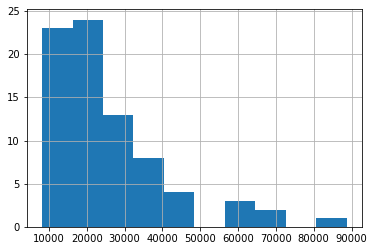

In [8]:
census['income'].hist()

Using Matplotlib.pyplot we can quickly add a title and labels for the axes.

Text(0.5, 1.0, 'Yearly Income per Community Area')

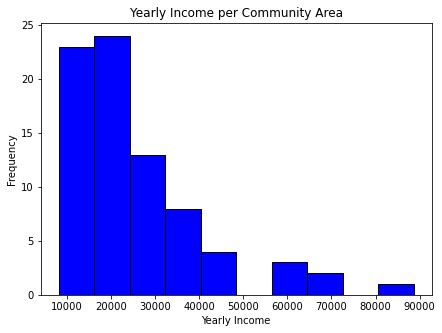

In [9]:
#Define figure object
fig=plt.figure(figsize=(7,5))
#define axes object
ax=fig.add_subplot(1,1,1)
#Label the axes
ax.set_xlabel("Yearly Income")
ax.set_ylabel("Frequency")
#Define the plot
census['income'].plot.hist(ax=ax, edgecolor="black", alpha=1.0, color="b")
#Set title
ax.set_title('Yearly Income per Community Area')

The default number of bins is 10.  We can change the number of bins using the bins parameter.

Text(0.5, 1.0, 'Yearly Income per Community Area')

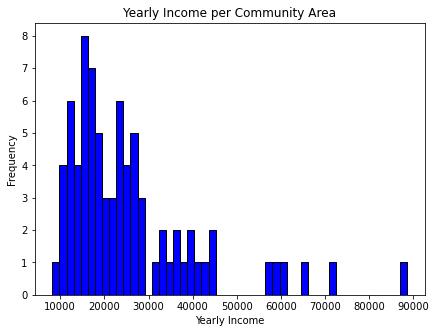

In [10]:
#Define figure object
fig=plt.figure(figsize=(7,5))
#define axes object
ax=fig.add_subplot(1,1,1)
#Label the axes
ax.set_xlabel("Yearly Income")
ax.set_ylabel("Frequency")
#Define the plot
census['income'].plot.hist(ax=ax, edgecolor="black", bins = 50, alpha=1.0, color="b")
#Set title
ax.set_title('Yearly Income per Community Area')

The term *distribution* is often used incorrectly by data scientists.  When a data scientist refers to the *distribution of a column* in a dataset, what they mean is the *frequency histogram of the **sample** that comes from some **unknown** probability distribution*.

We don't know what probability distribution generated the data in the column, but we can estimate it.

Luckily for you and me, the *density* function can estimate this for us. 

<AxesSubplot:xlabel='Yearly Income', ylabel='Density'>

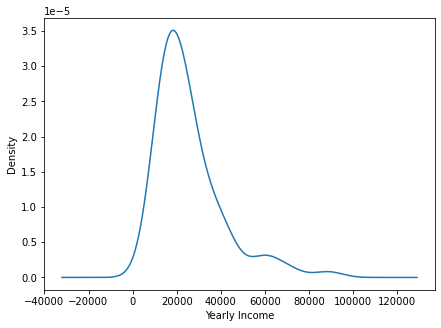

In [13]:
#Define figure object
fig=plt.figure(figsize=(7,5))
#define axes object
ax=fig.add_subplot(1,1,1)
#Label the axes
ax.set_xlabel("Yearly Income")
#Define the plot
census['income'].plot.density()

The Seaborn *displot* function puts both of these graphs into one.

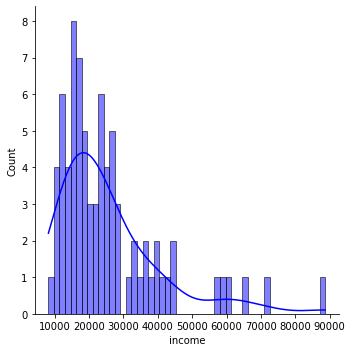

In [27]:
sns.displot(data=census, x="income",edgecolor="black", bins = 50, color="b", kde=True)

$\Box$

We can better understand the distribution of a column using the *describe* method. 

##### Example 2

In [11]:
census['income'].describe()

count       78.000000
mean     25597.000000
std      15196.405541
min       8201.000000
25%      15804.750000
50%      21668.500000
75%      28715.750000
max      88669.000000
Name: income, dtype: float64

The values with indices $25\%$, $50\%$, and $75\%$ are the 25th, 50th, and 75th percentiles.

$\Box$

#### Summary Stats

We can compute summary stats for a column or all columns or rows by passing an axis agrument.

##### Example 3

In [14]:
census.head()

,name,crowded,poverty,unemployed,no_hs_diploma,dependent,income,hardship
0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


Note the alternate dot notation to access a column.

In [13]:
census.no_hs_diploma.mean()

20.33076923076923

Since the name column is not numeric, we use iloc to select only the numeric columns.

In [26]:
census.iloc[: , 1:].mean(axis = 0)

crowded              4.920513
poverty             21.739744
unemployed          15.341026
no_hs_diploma       20.330769
dependent           35.717949
income           25597.000000
hardship            49.506494
dtype: float64

In [27]:
census.iloc[: , 1:].mean(axis = 1)

0     3437.671429
1     3311.300000
2     5125.385714
3     5371.771429
4     8167.528571
         ...     
73    4921.600000
74    3894.157143
75    3702.757143
76    4781.285714
77    4715.383333
Length: 78, dtype: float64

$\Box$

We saw in the previous notebook that NaNs can corrupt computations.  One really nice thing about Pandas' built-in summary stats functions is that they ignore NaNs in their computations, unless *skipna = False* is given as an argument.

##### Example 4

In [15]:
df = pd.DataFrame({'X':[1,2,np.nan,4, np.nan], 'Y':[9,np.nan,8,7,5], 'Z':[11,12,13,14,np.nan]})
df

,X,Y,Z
0,1.0,9.0,11.0
1,2.0,NaN,12.0
2,NaN,8.0,13.0
3,4.0,7.0,14.0
4,NaN,5.0,NaN


In [18]:
df.Y.to_numpy().sum()

nan

In [19]:
df.sum(axis = 0)

X     7.0
Y    29.0
Z    50.0
dtype: float64

$\Box$

Many other summary stats methods, including the standard deviation (std) and median can be found in Table 5.8 of our course text.

### Correlation and Covariance

Both the *Correlation* and *Covariance* describe *the degree to which two random variables deviate from their expected values*.

#### Correlation

Does it seem like there would be a correlation between *hardship* and *poverty*? 

##### Example 5

In [28]:
census.head()

,name,crowded,poverty,unemployed,no_hs_diploma,dependent,income,hardship
0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


We can use the *corr* method to measure the *correlation* between these columns.  

Recall that the correlation measures the degree to which two random variables are linearly related.  Moreover, $-1\leq$ correlation $\leq 1$.

In [29]:
census['poverty'].corr(census['hardship'])

0.8032665794912704

We were right!  They are correlated.  We can visualize this relationship with the Seaborn *regplot* function.

<AxesSubplot:xlabel='poverty', ylabel='hardship'>

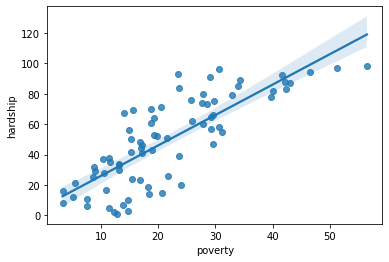

In [31]:
sns.regplot(x = 'poverty', y = 'hardship', data = census)

Notice that the *linear regression line* is also given in the plot.

$\Box$

A *pairplot* shows a scatterplot for every pair of columns in the dataset.  Histograms are given on the diagonal.

##### Example 6

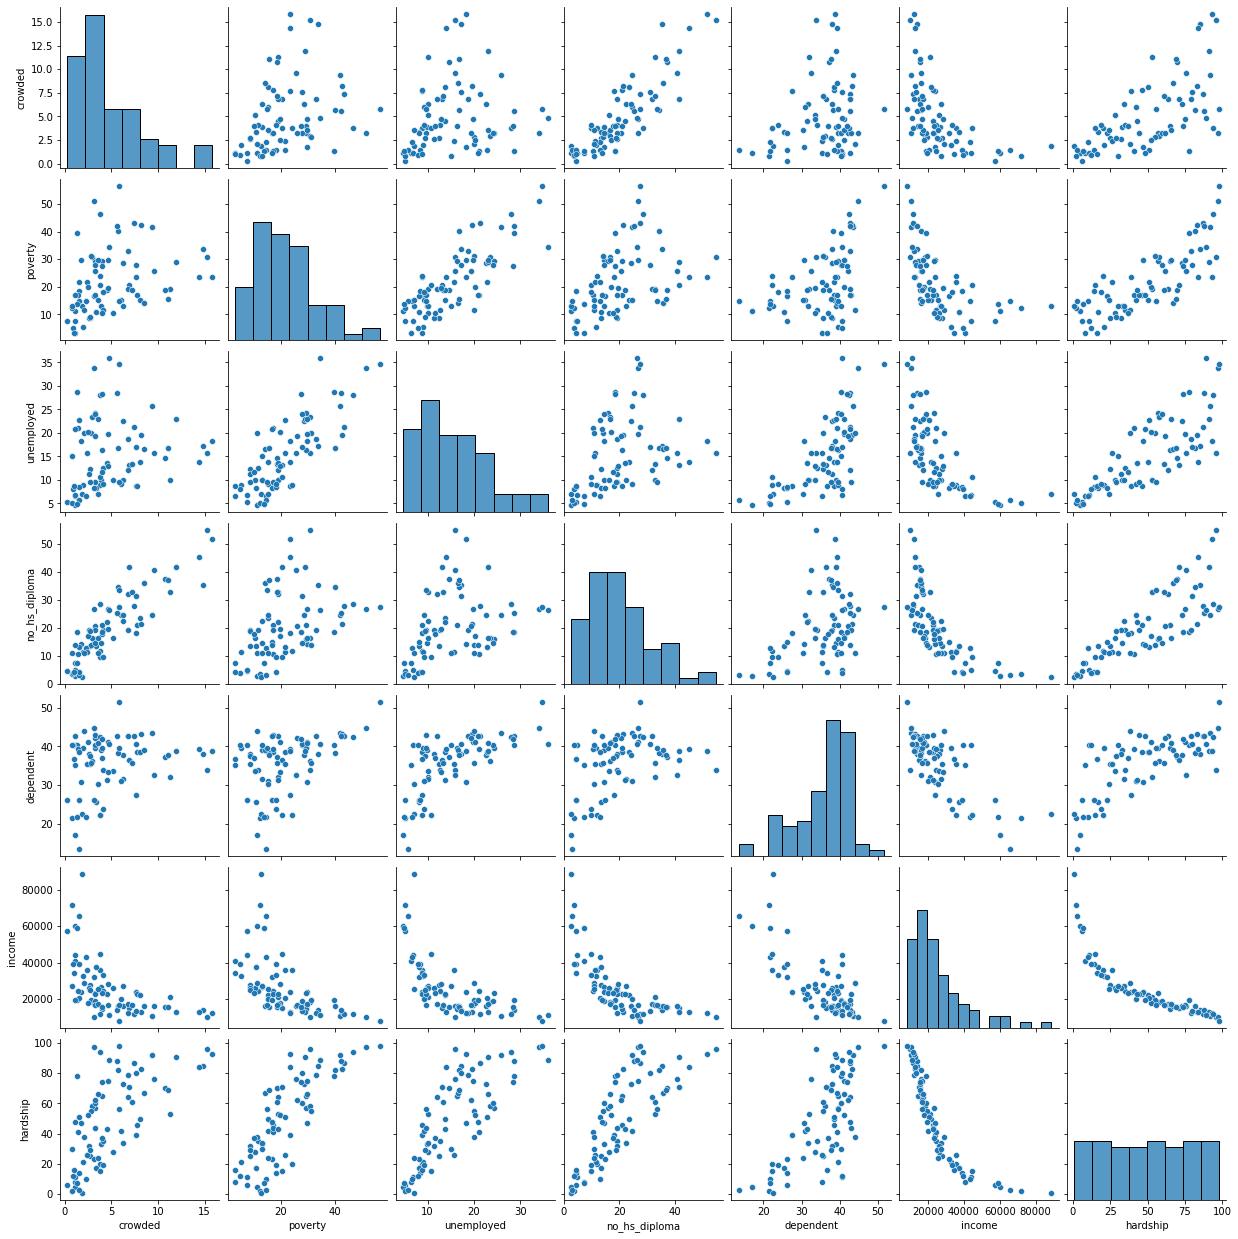

In [33]:
sns.pairplot(census.iloc[:, 1:], diag_kind = 'hist')

$\Box$

#### Variance and Covariance

Choose two columns of a dataset $\mathcal{D}$ and label them $x$ and $y$.  The *Covariance* of $x$ and $y$ is the quantity $$\text{cov}(x,y)=\frac{1}{N}\cdot \sum(x_i-\mu_x)(y_i-\mu_y)$$  The *variance* of a single column, say $x$, is defined as $cov(x,x)$.  

When the data set is mean centered, the formula above reduces to $\text{cov}(x,y)=\frac{1}{N}\cdot \sum x_i \cdot y_i$.

We can compute the covariance between two columns in a DataFrame use the *cov* method.

##### Example 7

In [35]:
census['poverty'].cov(census['hardship'])

265.7212747778536

$\Box$

#### Covariance Matrix

Given a data set $\mathcal{D} \in \mathbb{R}^{N \times F}$ with features $x_1,...,x_F$, the *Covariance Matrix* of $\mathcal{D}$ is the matrix with entries $\text{cov}(x_i,x_j)$.  Since $cov(x_i,x_j)=cov(x_j,x_i)$, it is seen that $\text{cov}(\mathcal{D})$ is a *symmetric* matrix whose ith diagonal entry gives the covariance of feature $x_i$.

The following function computes the covariance matrix for a given dataset.  Note that all data must be numeric to produce the covariance matrix.

In [36]:
def cov(D):
    """Compute the sample covariance for a dataset.
    Args:
        D: ndarray of shape (N, D) representing the dataset.
        N is the size of the dataset (the number of data points) 
        and D is the dimensionality of each data point.
    Returns:
        ndarray: ndarray with shape (D, D), the sample covariance of the dataset D.
    """
    N=D.shape[0]
    mu=np.mean(D, axis=0)
    return ((D-mu).T@(D-mu))/N

##### Example 8

We compute the covariance matrix for all numeric columns in the census dataset.

In [37]:
cov(census.iloc[:, 1:])

,crowded,poverty,unemployed,no_hs_diploma,dependent,income,hardship
crowded,13.216502,13.218287,4.477748,37.166292,5.912068,-2.973582e+04,NaN
poverty,13.218287,129.585215,67.864652,56.370444,35.913005,-9.745831e+04,NaN
unemployed,4.477748,67.864652,55.521394,30.917071,36.484776,-7.387242e+04,NaN
no_hs_diploma,37.166292,56.370444,30.917071,136.211617,34.537781,-1.250731e+05,NaN
dependent,5.912068,35.913005,36.484776,34.537781,52.382498,-8.248767e+04,NaN
income,-29735.816667,-97458.314103,-73872.417949,-125073.097436,-82487.667949,2.279701e+08,NaN
hardship,NaN,NaN,NaN,NaN,NaN,NaN,NaN


$\Box$

### Box Plots

*Box Plots* give a visual representation of a variables distribution.

##### Example 9

For this example, we will use the Small Business Administration Loan Default dataset.  This dataset provides info about small buisnesses who received loans from the SBA and has a binary label for each row.  These labels are defined as 

1 = paid the loan off

0 = defaulted on the loan

First we will load and clean the dataset.

In [43]:
data=pd.read_csv("SBAnational.csv")

C:\Users\jason.smith2\AppData\Local\Temp\ipykernel_24996\3339543397.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("SBAnational.csv")


We add a label column using another column as the domain for the apply function.  P I F stands for paid in full.

In [44]:
data["default"]=data.MIS_Status.apply(lambda x: 0 if x=="P I F" else 1)

The ultimate goal with this dataset, is to create a classifier that can predict whether or not a loan will go into default or will be paid in full.

To this end, we search for columns that have good "separation", meaning that the rows labeled 0 are somewhat separated from the rows labeled 1.  A column with good separation could really help us to make a good classifier.

The boxplot below shows us that the Term column has good separation.

<AxesSubplot:xlabel='default', ylabel='Term'>

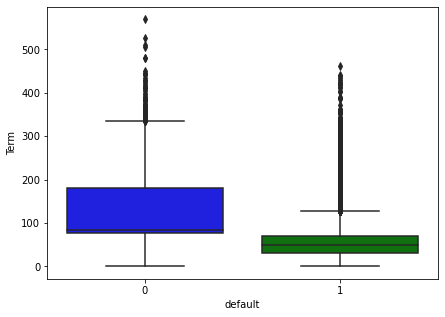

In [45]:
#Define figure object
fig=plt.figure(figsize=(7,5))
#define axes object
ax=fig.add_subplot(1,1,1)

ax.set_xlim([0,600])
ax.set_yticks(np.arange(0, 550, 100))

sns.boxplot(ax=ax, x="default", y="Term", data=data, palette={0:"b" , 1:"g"})

$\Box$